## Importing Required Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#  Data Preprocessing 

In [5]:
df['Area']= df['longitude'] * df['latitude']

In [6]:
df = df.drop("longitude", axis='columns')

In [7]:
df = df.drop("latitude", axis='columns')

In [8]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Area
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-4630.0724
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-4627.2492
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-4626.7840
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-4627.1625
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-4627.1625
...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-4780.6332
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-4786.5829
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-4779.7046
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-4783.6476


# Features Extraction

In [9]:
features1 = df[['Area','total_rooms','housing_median_age']]
features2 = df[['median_house_value']]


In [10]:
features2

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:>]], dtype=object)

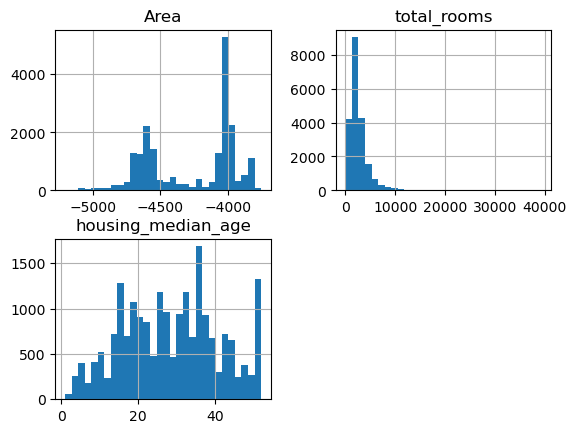

In [11]:
features1.hist(bins=30)

# Data Visualization

array([[<AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

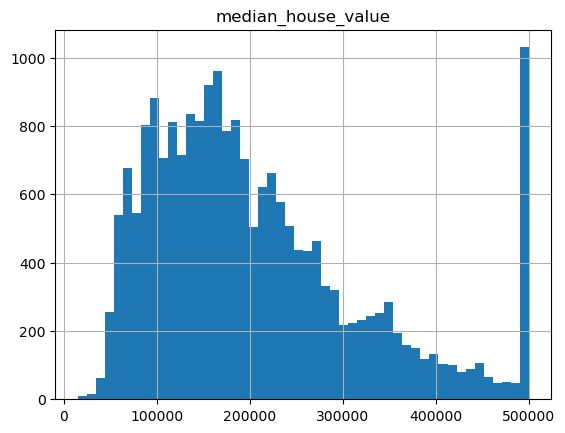

In [12]:
features2.hist(bins=50)

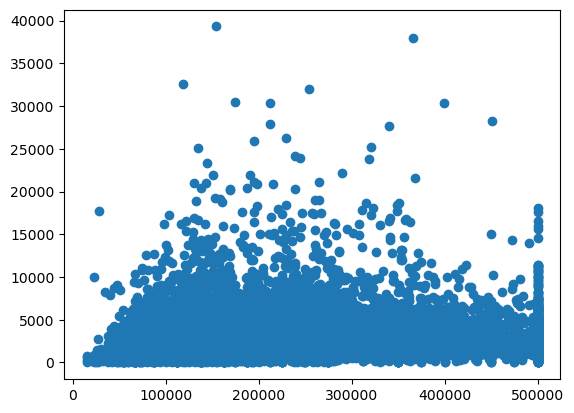

In [13]:
plt.scatter(features2['median_house_value'],features1['total_rooms'])
plt.show()

# Data Spliting For Testing & Training

In [14]:
msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

# Model Training By Linear Regression Algo

In [15]:
reg = LinearRegression()

In [16]:
train_x = np.asanyarray(train[['median_house_value']])
train_y = np.asanyarray(train[['total_rooms']])
reg.fit(train_x,train_y)

LinearRegression()

# Finding Cofficients & Intercept

In [17]:
print('Cofficient',reg.coef_)
print('Intercept',reg.intercept_)

Cofficient [[0.00248004]]
Intercept [2122.65087747]


# r2_score Report

In [18]:
from sklearn.metrics import  r2_score
test_x = np.asanyarray(test[['total_rooms']])
test_y = np.asanyarray(test[['median_house_value']])
test_y_= reg.predict(test_x)
print("Mean Ablosute : %.2f" %np.mean(np.absolute(test_y_ - test_y)))

print("Residual sum of square(MSE): %.2f" %np.mean((test_y_  - test_y)))

print("R2-score%.2f" %r2_score(test_y_,test_y))


Mean Ablosute : 202387.50
Residual sum of square(MSE): -202387.50
R2-score-1840128157.45
